# Introduction
___
* Linear regression modeling in this notebook

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cleaned_mlb.csv')

In [3]:
print(df.shape)
df.head()

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


In [138]:
# split the set in a 8:2 seasons ratio
train_set = df[:648]
test_set = df[648:]

## Train-Test Split
___

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [6]:
target = train_set['attendance']
features = train_set.drop(columns= 'attendance')

In [7]:
features.shape

(648, 50)

In [8]:
print('Average attendance for 8 seasons is:', int(target.mean()))
target.shape

Average attendance for 8 seasons is: 30174


(648,)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=9,test_size=0.20)

In [116]:
X_train.shape

(518, 50)

## Modelling Process
____

### Dummy Regressor

In [93]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()

In [95]:
dummy.fit(X_train, y_train)

dummy_preds_test = dummy.predict(X_test)

dummy_test_rmse = np.sqrt(mean_squared_error(y_test, dummy_preds_test))

print('Testing RMSE:' , int(dummy_test_rmse))

Testing RMSE: 5951


## Linear Regression

In [60]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
#evaluate the predictions on the test examples
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Training RMSE:' , int(train_rmse))
print('Testing RMSE:' , int(test_rmse))

Training RMSE: 4568
Testing RMSE: 4739


In [61]:
rmse_dict = {'Linear Regression': test_rmse}
rmse_dict

{'Linear Regression': 4739.154219660758}

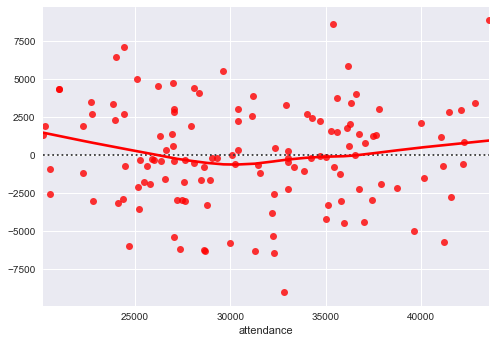

In [62]:
sns.residplot( y_test, y_test_pred,lowess=True, color= 'red')

### K-Best Model

In [77]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=25)

selector.fit(X_train, y_train)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fa837351790>)

In [78]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [79]:
print(removed_columns)

Index(['Apr', 'Aug', 'May', 'ARI', 'BAL', 'CHC', 'CHW', 'CIN', 'CLE', 'COL',
       'DET', 'FLA', 'HOU', 'KCR', 'MIN', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG',
       'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='object')


In [80]:
print(selected_columns)

Index(['rank', 'games_behind', 'night_game', 'cli', 'streak',
       'games_left-games_behind', 'weekend', 'weekend_x_night', 'Jul', 'Jun',
       'Mar', 'Oct', 'Sep', 'Friday', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'ATL', 'BOS', 'LAA', 'LAD', 'MIA', 'MIL', 'NYY'],
      dtype='object')


In [81]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4689
Testing RMSE: 4567


In [82]:
print('Testing MAE:' , int(mean_absolute_error(y_test, test_kbest)))

Testing MAE: 3710


In [83]:
rmse_dict['k-Best'] = testK_rmse
rmse_dict

{'Linear Regression': 4739.154219660758, 'k-Best': 4567.226800462307}

## Polynomial Features


In [22]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(features)
poly2_columns = poly_2.get_feature_names(features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,rank,games_behind,night_game,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN,...,OAK STL,OAK TBR,OAK TEX,OAK TOR,OAK WSN,PHI^2,PHI PIT,PHI SDP,PHI SFG,PHI STL,PHI TBR,PHI TEX,PHI TOR,PHI WSN,PIT^2,PIT SDP,PIT SFG,PIT STL,PIT TBR,PIT TEX,PIT TOR,PIT WSN,SDP^2,SDP SFG,SDP STL,SDP TBR,SDP TEX,SDP TOR,SDP WSN,SFG^2,SFG STL,SFG TBR,SFG TEX,SFG TOR,SFG WSN,STL^2,STL TBR,STL TEX,STL TOR,STL WSN,TBR^2,TBR TEX,TBR TOR,TBR WSN,TEX^2,TEX TOR,TEX WSN,TOR^2,TOR WSN,WSN^2
0,-1.88,1.13,-1.41,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
1,-0.04,0.99,0.71,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
2,0.89,0.99,0.71,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
3,-0.96,0.99,0.71,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34
4,0.89,0.86,-1.41,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

### Polynomial: Lasso Model


In [24]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.001, normalize=False, max_iter=100000, )

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_lasso01 = np.sqrt(mean_squared_error(y_test, y_pred))

print('Training RMSE:', int(train_rmse_lasso01) )
print('Testing RMSE:', int(test_rmse_lasso01) )

Training RMSE: 1706
Testing RMSE: 181371


/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752749208.9499562, tolerance: 2009773.4360442087
  model = cd_fast.enet_coordinate_descent(


In [84]:
rmse_dict['Poly-Lasso'] = test_rmse_lasso01
rmse_dict

{'Linear Regression': 4739.154219660758,
 'k-Best': 4567.226800462307,
 'Poly-Lasso': 181371.31432747492}

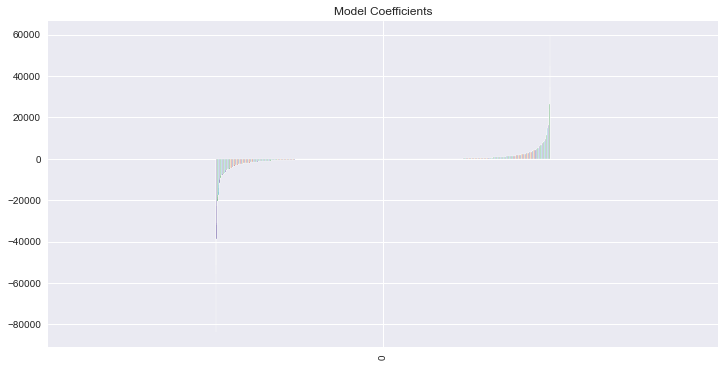

In [26]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(12,6))
plt.show()

### Polynomial: K-Best Model

In [85]:
selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=30, score_func=<function f_regression at 0x7fa837351790>)

In [86]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [87]:
print(removed_columns)

Index(['Apr', 'Aug', 'May', 'ARI', 'CHC', 'CHW', 'CLE', 'FLA', 'HOU', 'KCR',
       'MIN', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'STL', 'TBR', 'TEX', 'WSN'],
      dtype='object')


In [88]:
print(selected_columns)

Index(['rank', 'games_behind', 'night_game', 'cli', 'streak',
       'games_left-games_behind', 'weekend', 'weekend_x_night', 'Jul', 'Jun',
       'Mar', 'Oct', 'Sep', 'Friday', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'ATL', 'BAL', 'BOS', 'CIN', 'COL', 'DET', 'LAA', 'LAD',
       'MIA', 'MIL', 'NYY', 'TOR'],
      dtype='object')


In [89]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4634
Testing RMSE: 4590


In [96]:
rmse_dict['Poly-K-Best'] = testK_rmse
rmse_dict['Dummy Regressor'] = dummy_test_rmse
rmse_dict

{'Linear Regression': 4739.154219660758,
 'k-Best': 4567.226800462307,
 'Poly-Lasso': 181371.31432747492,
 'Poly-K-Best': 4590.424103323263,
 'Dummy Regressor': 5951.446655071147}

In [114]:
rmse_df = pd.DataFrame(rmse_dict.values(), columns=['RMSE'], index = rmse_dict.keys())
rmse_df.sort_values(by='RMSE')

,RMSE
k-Best,4567.23
Poly-K-Best,4590.42
Linear Regression,4739.15
Dummy Regressor,5951.45
Poly-Lasso,181371.31


## Fit The Best Model On The Entire Train Set And The Holdout Set
___

In [120]:
selector = SelectKBest(f_regression, k=25)

selector.fit(features, target)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fa837351790>)

In [121]:
selected_columns = features.columns[selector.get_support()]
removed_columns = features.columns[~selector.get_support()]

In [127]:
lm_kbest = LinearRegression()

lm_kbest.fit(features[selected_columns], target)

full_train_kbest = lm_kbest.predict(features[selected_columns])  # predict on the train and test k-best

full_trainK_rmse = np.sqrt(mean_squared_error(target, full_train_kbest))  # calculate the train-test RMSE

print('Training RMSE:' , int(full_trainK_rmse))

Training RMSE: 4657


### Predict the Holdout

In [139]:
test_target = test_set['attendance']

test_features = test_set.drop(columns='attendance')

In [145]:
selector.fit(test_features, test_target)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fa837351790>)

In [146]:
selected_columns = features.columns[selector.get_support()]
removed_columns = features.columns[~selector.get_support()]

In [151]:
lm_kbest = LinearRegression()

lm_kbest.fit(test_features[selected_columns], test_target)

holdout_kbest = lm_kbest.predict(test_features[selected_columns])  # predict on the train and test k-best

holdoutK_rmse = np.sqrt(mean_squared_error(test_target, holdout_kbest))  # calculate the train-test RMSE

print('Testing RMSE:' , int(holdoutK_rmse))
print('Testing MAE:', int(mean_absolute_error(test_target, holdout_kbest)))

Testing RMSE: 3866
Testing MAE: 2942
